In [40]:
!pip install -U spacy -q

In [41]:
!python -m spacy info

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-22 07:32:14.551335: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-22 07:32:14.551526: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-22 07:32:14.551558: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [42]:
import json

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
file_path = '/content/drive/MyDrive/23SS_NLP/perfume/annotations_5.json'

# with open(file_path, 'r')as f:
#   data = json.load(f)

f = open(file_path, encoding='UTF-8')
data = json.loads(f.read())

In [44]:
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm

nlp = spacy.blank("en")
db = DocBin()

In [45]:
data

{'classes': ['FRAGRANCE'],
 'annotations': [['Has anyone figured out what that citrus aromatic chord at the top is  I think maybe bergamot and coriander  ',
   {'entities': [[33, 39, 'FRAGRANCE'],
     [40, 48, 'FRAGRANCE'],
     [84, 92, 'FRAGRANCE'],
     [97, 106, 'FRAGRANCE']]}],
  ['Has anyone figured out what that citrus aromatic chord at the top is  I think maybe bergamot and coriander  ',
   {'entities': [[33, 39, 'FRAGRANCE'],
     [40, 48, 'FRAGRANCE'],
     [84, 92, 'FRAGRANCE'],
     [97, 106, 'FRAGRANCE']]}],
  [' ', {'entities': []}],
  ['Has anyone figured out what that citrus aromatic chord at the top is  I think maybe bergamot and coriander  ',
   {'entities': [[33, 39, 'FRAGRANCE'],
     [40, 48, 'FRAGRANCE'],
     [84, 92, 'FRAGRANCE'],
     [97, 106, 'FRAGRANCE']]}],
  [' I LOVE this  this scent brings me so much comfort and happiness whenever I wear it  I really like the  plum preserve  smell its so addicting  I cant keep sniffing myself ',
   {'entities': [[104, 1

In [46]:
for text, annot in tqdm(data['annotations']):
  doc = nlp.make_doc(text)
  ents = []
  for start, end, label in annot["entities"]:
    span = doc.char_span(start, end, label = label, alignment_mode = "contract")
    if span is None:
      print("skipping entity")
    else:
      ents.append(span)
  doc.ents = ents
  db.add(doc)

  db.to_disk("./data.spacy")

100%|██████████| 182/182 [00:01<00:00, 142.48it/s]


In [47]:
file_pathv = '/content/drive/MyDrive/23SS_NLP/perfume/annotations_val.json'

# with open(file_path, 'r')as f:
#   data = json.load(f)

d = open(file_pathv, encoding='UTF-8')
data_val = json.loads(d.read())

In [48]:
for text, annot in tqdm(data_val['annotations']):
  doc = nlp.make_doc(text)
  ents = []
  for start, end, label in annot["entities"]:
    span = doc.char_span(start, end, label = label, alignment_mode = "contract")
    if span is None:
      print("skipping entity")
    else:
      ents.append(span)
  doc.ents = ents
  db.add(doc)

  db.to_disk("./data_val.spacy")

100%|██████████| 189/189 [00:04<00:00, 39.06it/s]


In [49]:
! python -m spacy init config config.cfg --lang en --pipeline ner --optimize efficiency

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-22 07:32:35.105965: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-22 07:32:35.106148: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-22 07:32:35.106177: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [50]:
! python -m spacy train config.cfg --output ./ --paths.train ./data.spacy --paths.dev ./data_val.spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-22 07:32:43.729555: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-22 07:32:43.729708: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-22 07:32:43.729734: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [51]:
nlp_ner = spacy.load('/content/model-best')

### 2번째 향수데이터 : text2

In [52]:
text2 = '''This keeps growing on me more and more   It has also increased my love for blue fragrances   It s fresh  bright  ambery  and warm   I always feel really good when I where this one   I love the sharp  zesty citrus in the opening and how the florals blend with the cinnamon  Ambroxan  and Amberwood   It adds a warm  coziness   This lasts forever on my skin   I can smell it after a work day   On occasion I layer this with MFK baccarat rouge 540 and it is amazing   This was my signature fragrance for a long time   It works anytime  anyplace  and anywhere   However when I where this to work one to two sprays max or it was to strong   With that being said this has great performance   There are others like this but this is well rounded and refined   This is a high quality blue fragrance with a lot going on   My girlfriend loves this more than me and she has a great nose   It s funny how that works   With all that going on it makes this easier to reach for without a second thought   
9 5 10 This is a case of being lured by the top  then left wanting in the mid and drydown  The biggest difference between the real thing and all the dupes is that beginning  an awesome fruity melange that doesn t smell of the citrus listed  but citrus melded with the hedione  violet and cinnamon to create a berry like  delectable vibe  Blink and you re in the looong floral mid  with lavender balsam fir ambrox spiking out at you  It s not far from a Beau de Jour   Eau Sauvage landscape  and its quality is not in doubt  But it s too familiar here and holds fast to this lavender spike  That s when you ll long for that first berry impression  Several hours in  you re left with a nice amber  minimal woods   with close projection  Nice  really  but not  150  nice  I m fairly new to this   been wearing fragrances for a long time but typically only had a couple in my collection  As I ve dove down this rabbit hole and started to expand my collection  I ve found that I typically don t like  blue  fragrances  They just don t excite me or match my personality  Having said that  I decided I wanted to own a couple blues to round out my collection  I sampled a lot of them  To my nose  Percival is one blue that deserves to be in my collection  Is it super different than many other blues  No  To me  it just smells like the best  most nuanced  rounded  smooth  mature  amazing blue  You can get 85  of this at half the cost or less for sure  but for me I was happy to spend the money to have what I consider a  grail  blue scent  In case you re curious  Bleu de Chanel EDP is the other one I ended up with  I also own Nautica Voyage which I really like  Tried today as part of a discovery set  Lavender is there for sure but not overpowering  Initially it smells quite blue to me with a bit of unidentifiable acidic citrus  kind of like a blue bubble bath   nice and fresh but nothing too special or unique  To me  the dry down smells slightly similar to Terre D Hermes because of a slightly dirty orange which I m not overly keen on  It s okay but not for me  I really wanted to love PDM fragrances as I had never smelled them before and heard a lot of rave reviews  but so far I m quite underwhelmed  Percival does not seem to work well with my skin chemistry  unfortunately  I have tried it in different climates  it does smell better in warmer weather but doesn t seem to perform well  A skin scent after an hour  When I first tried it in cool temperatures  it turned into a smell I can only describe as a muddled mess  Maybe the lotion I was using at the time tampered with the scent too  But now in warmer temps where I m not regularly applying lotion  yes it s better  but still only smells like an Old Spice shower gel at best  and doesn t project  It seems like one of the notes  don t know which  but perhaps musk  is mixing with my skin s natural scent and wafting something that just doesn t agree with me   
I may revisit Percival another time  but it s a no for me   Disclaimer  I have Covid so I will more than likely have to revisit this review and edit it when I m healthy  
My first impression was moderate surprise  I had never smelt a safer fragrance  It was utterly timid and neutered  After the first 5 minutes absolutely delightful notes start venturing out  it s still a very soft and gentle scent  The real stars in this one  for my nose in its current condition  are orange  violet  jasmine  and geranium  The base notes are subtle and appear more and more thought the dry down  It has a sort of clean soapy aire about it although I wouldn t classify it as soapy  This offering could be my favorite from de Marly so far  but I have a few more to get my nose on  The ones I have left to try are the fresh and brighter selections which is my love  7 4 10 Really like this one  For me it s one of those  chuck on and forget  scents  much like BDC and explorer for example  It smells good  has great mass appeal  nice projection and longevity  And yes  it s true this smells like fierce and legend  However  this is miles better  Smells much less synthetic  which sometimes isn t a bad thing  and more natural than either  better quality for sure  The lavender is a star player from the get go  but as it dries down you re left with this rather linear scent but smells great  
It s one of PDM s stronger releases for me  PDM can be a bit strange with my skin chemistry sometimes  the performance is lacking on me  whereas it s amazing on others  Layton and Carlisle are good examples of this for me  Albeit be it great scents   
Just sample this one and buy it  This is  as most have stated  a niche  more refined  smoother  better performing version of A F Fierce Montblanc Legend  It smells really nice and invokes lots of memories  Performance is above average  but definitely not super strong  Projection   Sillage is good for about an hour  then it calms down and you get sniffs throughout the day for about 5 6 hours  
While i love this  I m not sure I can justify the pricing  even at discounters  since i have Legend Parfum  and it doesn t do very much above and beyond Legend in the air and dry down  In the air  it s pretty similar  Up close you can tell a difference  but I think most people would be hard pressed to tell the difference passing by others  Absolute ladykiller scent  I have never received so many compliments off a fragrance until I tried this masterpiece  It shares similar vibes to AF fierce and MB legend but blows them out of the water with pure class  better ingredients  and a much longer life  lasts close or over 24hr on my skin depending on activity level   it beautifully transforms with each layer from subtle zesty orange goodness to a blue scent with just the right amount of lavender and other florals  gives off major CEO vibes and will be liked by all  you can t go wrong with this scent which I believe to be the best creation from PDM so far  This scent is insane  My fiance had a sample of of Percival  and let me say HOTdamn   
Top  Fizzy citruses and bitter green fir
Mid  CLASS ACT geranium  lavender and some fresh spicy showergel  barbershop magic 
Bottom of  hot sand  salty warm ambroxan and chewy golden amberwood 
The cinnamon and amberwood   mandarin makes it slight cola esque  but in the most modern  refreshing mouthwatering way  The top and bottom notes melt instantly to me  
Graceful and seductive with his sunkissed skin and ironed linen shirt  Even my stepmom who hates every perfume besides Molecule 01 said woah     Probably the best  freshie  I have ever smelled  Absolutely amazing execution by PDM  Encompasses a rare depth to this style of scent  which is often fairly one dimensional   Transitions into an extremely pleasant  almost powdery dry down while maintaining freshness  Best fragrance in the PDM line in my opinion  Nice to have a PDM that doesn t resort to the ubiquitous  vanilla  note that they spam into every fragrance  AF Fierce comparisons are definitely apparent  If you enjoy Fierce or Montblanc Legend at all  this is the luxury upgrade  Dumb reach  great performance as well  lasts forever  If you can find a 4oz bottle below retail it is a must buy  in my opinion  Percival is among the  safest  choices within the house of Parfums de Marly  a bright  oceanic scent reminiscent of fresh colognes from designers or common retailers  It is bright and inviting  A consistent  compliment getter  from youthful people  It doesn t scream sophistication  but more so simplicity  The opening pours citrus onto delicate lavender  like an expensive shower gel  and quickly mellows into light florals with the smallest hint of spice  On the dry down  close to the skin  remains the freshness but with a whisper of green woods from the Pacific Northwest  You re not likely to have company think you are wearing something expensive  but you are likely to have people comment and get a bit closer  It s the perfect excuse for a sweetheart to place their nose near the nape of one s neck and linger for just a second too long  A crowd pleaser  but perhaps a bit too dear  
Who wears Percival  I picture a young man  late 20s  who is successful and rich but mostly as a result of nepotism  He has a date tonight  He stands in his shower  marble from floor to ceiling  steamy water shooting from inlaid jets in the walls and falling from the ceiling like a rainforest cloud  He s devastatingly handsome and knows it  Too confident for his own good  but perhaps less so when it comes to fashion  He steps out of the shower  wrapping a towel around his chiseled waist  He wipes away the condensation to admire his perfect teeth and rolls on the same deodorant he has used since high school  But before leaving the misty bathroom  he grabs his bottle of Percival  It s new  but reminds him of an old friend  The perfect evolution from when he wore Abercrombie   Fitch s Fierce  in prep school  or Montblanc s Legend  at Columbia   A few sprays on his freshly waxed chest and he knows he will impress his date  The final ingredient to complement such an alluring beau  The opening is strong if you do more than 4 applications  you get the citrus and ambroxan it lasts for around 20 minutes  You get fresh citrus notes and that fir it starts settling into a floral spicy but not feminine  you get some faint woods and musk and almost no ambroxan at the end  It does remind me of Montblanc legend but this is way better  Higher quality better scent and very masculine  You can wear it all year round but not in really cold weather  It has good performance 8 9 hrs and arms length projection for 2 hours at least  For this type of fragrance it performs great  The price is high because it s from a niche house but profile is very familiar  If you get it for a good price get it  full retail I would not pay for it even if it s great  This is a citrusy  woody  musky scent   
It smells like a really nice citrus shower gel  or those gel crystals we used to all burn in the 90 s   
It s a great scent  and a mass appealing compliment getter  Is it worth the asking price  Probably not  but it depends on your budget and who you ask   
You can t go wrong with it  it s really nice but for the price point you d expect better longevity   
There are better fragrances at this price point  After having different batches of Percival over the past year   selling   buying   selling again   I ve come to realize it actually smells like a chemical mess  exactly like the cleaning product used at my job    Very reminiscent of the newer Creed Himalaya in terms of the punchy  sharp   musky overload thing going on 
If I could rank the scent profile DNA 
1  At The Barbers  muah    
2  Platinum Ego ste  classic  but too sharp 
3  Creed Himalaya  not enough  flavor  
4  Possibly  MFK Masculine Plural 
The citrus needs to be amped up 
The lavender is of low quality   smells sharp metallic  on top of that is the ambroxon amplifying it  and the must just creates a cloudy haze kinda smothering the notes together  
Bottom line  I ll just stick with Sedley forever   I read a lot of reviews with people saying this or that fragrance is nice but it doesn t blow them away  
It s weird to me because I am a huge fan of fragrances and by virtue of being a huge fan am constantly blown away by them  That being said  most fragrances do not blow me away but a good few do  
Percival is just such a fragrance that has blown me away  truly  And the reactions to it have blown me away  People really like the stuff and it smells great  
It indeed has a similar vibe as Abercrombie and Fitch Fierce  but is smoothed out and matured  
Very pleasant and very easy to wear for any occasion  
PDM in general makes some killer fragrances and Percival is no exception  
I love it and would recommend it as a blind buy  I just want to premise I picked up a decant from a subscription service as I m running out of interesting scents to try I figured I d try this  So this is not my type of scent  take that into consideration  That said  how many times has this scent been done     I haven t smelled aqua di gio in a long time I didn t like that either but this instantly brought back memories of that one and many others  Just a sharp piercing Freshie  Amber is listed in notes  Cinnamon  There s no warmth here no juxtaposition of notes   More proof also how much I dislike ambroxan  I m not a  blue scent  guy but Bleu de Chanel Versace Eros and some others are pleasant enough  This doesn t remind me of those  I couldn t bear this scent all day  Terrible As I am finding with more and more hyped niche  this fails to impress me 
I get it   I have been wearing fragrances since the mid 80 s   the original Jazz  Kouros  Romance  Eternity  Envy etc etc  I was lucky to discover Green Irish Tweed in the late 90 s which has been my signature spoil ever since 
PDM hasn t wowed me at all   as soon as I put this on  I had memories of Eternity  Michael Kors and my  20 bottle of Mont Blanc legend spirit 
Sure  Percival has quality ingredients but there s just no originality in it  
No way known I would pay the asking prices for this 
I encourage blind buyers excited by niche fandom to sample these first   Glad I sampled first before buying into the hype  Percival is really nothing outstanding  it s your standard blue fragrance which is slightly more well blended  but not by too much  This fragrance smells shockingly close to Ambercrombie and Fitch First Instinct Blue for me  which I picked up for 20 bucks at a discounter  Perhaps the performance is a bit better on Percival  but I don t think that justifies its pricetag   
All in all  it s a fine scent  just way too overpriced for what it is  You re better off buying a cheaper blue designer imo 
EDIT  just bought Montblanc Legend and it s literally almost the same as Percival  If you want a cheaper alternative try out that one  Got a 50 mil for under 30 bucks Yea you can say it s boring blue fragrance  yea it s a similar fragrance to others in the market or simple composition but this is perfect in every aspect  People around you will notice the quality difference  even so they will find the smell familiar which is already impressive 
There is no doubt how much hard work has been put into this to perfect it  it s simply didn t noticed because of the scent profile it is 
Overall I don t like blue fragrance so use them rarely mostly in gym days but when I have Percival on I love the experience it brings 
One of the best blue centric fragrance on the market  it has it all  even if you don t like this profile give it a chance I love this stuff  very fresh   easy to wear and so versatile i never have to consider the time of year  occasion  or location when i spray this on  Its is one of my wifes favorite scents on me  second only to Elysium  i have a 200ml of MB Legend EDT  and while i get similarities  Percival smells much higher quality  lasts way longer and overall is a much better fragrance  i dont see owning both as redundant   
Buy it  dont buy  like it  dont like it  I dont really care  i love it and will continue to buy it for that reason and no other  I tend to waffle back and forth on this one  From  I love this  to  it s just ok   No other fragrance in my collection does this to me  I think I may go nose blind to this one quite easily  as my perception of longevity varies between a few hours and as much as 10  
It s fresh and aromatic with a refreshing quality off the top  Slightly sweet and ambery  but not too far in either direction  It s playful leaning while still being suitable for a middle aged male   
One thing is for sure  don t pay retail  Find it from a reputable discounter  I bought this after initially not liking it  I thought the same thing most people have said  smells like Fierce  etc   But there s something special about Percival  Maybe it s the high quality ingredients  All I know is  I don t get tired of smelling it  and it gives me kind of a  boost  when I put it on   
And also maybe because of the high quality ingredients  I can smell deeper into it and still find it pleasing  I can t do that with the other ones that smell similar to Percival  Also  my wife absolutes LOVES the smell of this  It would probably be hard to find anyone who doesn t like this smell   
I bought the 125ml because I plan to use it often  and as much as I want  The other two PDM s that I own  Layton and Herod  smell more INTERESTING to me  But  they just don t have the strength that Percival does  Also  I m a self admitted over sprayer  I love for people around me to enjoy my fragrance  And this one is enjoyed by EVERYONE   
I love checking the reviews on Percival from time to time  I love that it is controversial  it makes it very interesting to read the comments lol  
Oh  one last thing  I bought mine at a discount  If I had to pay full price  I would not have gotten it  I think the retail prices of PDM are comically ridiculous  It smells a lot like joop nightflight  but less sharp 
Very smooth  and gives the vibe  not smell  just vibe  that you get from fragrances like creed aventus 
Fresh  sweet and somewhat smokey 
It also has a barbershop base layer  but it enda up smelling clean while rest of the fragrance makes it modern  
I really like this  
BUT  Omg  This stuff is nauseating  1 spray and I was good all day  and it easily got cloying 
I had to spray my back to keep it from overpowering me 
The way i see it  a perfect fragrance is airy enough for your skin chemestry to work with it  and for it to be a part of you 
On the other end of the spectrum  are the fragrances that feel like a thick layer over your skin that suffocates your natural scent  
And this fragrance feels like that thick layer  which is a shame  All PdM fragrances feel like that  and I think thats why people compare it to designers   
In moderation  and by spraying it where it stays a bot more hidden  it might feel a bit airy and more natural  And this just performs extremely well  
Im very close to picking up a full bottle  
Edit  i bought a full bottle 
Its better than most fragrances out there  so why not  right  This catches a lot of hate  you ll have that  
Is this similar  clone  inspired by A F Fierce and MB Legend  Oh yeah  100   
Does this do it better  OH YEAH  100   
Doesn t smell at all natural but does smell of higher quality and blend than the aforementioned  Great performance  people pleasing  anytime fragrance  What this fragrance does is well known and documented  so if you re not sure it s for you  sample sample sample  
PDM seems to catch a lot of hate for being a niche house with wearability in mind  and I can t say that I understand  For the people who don t enjoy wearable scents  there is an extremely easy solution right in front of you  
DON T BUY IT  
There s no reason for all the hate and Fragrantica is stricken with it anymore  You can t scroll through any new release that s mildly appealing without a host of condescending  experts  telling people how horrible it is just because people like it and someone told them they smelled nice  Just be quiet and sniff your poopy oud  
God bless  This was an important fragrance for me  I did a lot of reading  trying to find a freshie I liked  This came up on a short list of ones to try  So I did  
This is everything that I personally dislike in fragrances  It reminds me of trendy mall clothing stores  guitars as props  and M83 and Phoenix remixes on repeat  It smells artificial  cloying  and pungent  It s like smelling the results of someone trying to replicate natural scents from a written description only  
Look  it s potent  it s long lasting  it s probably very high quality  If you like it  then this is probably the shit  I hated it though  and it s helped me understand why I don t like some other fragrances  Worth checking out  Damn people love this shit   especially in the air  I like it too  but I m surprised that Legend Fierce Percival is enjoyed by younger people  It s very barbershop to me and I m surprised by that  Anyways  this is VERY well done and probably my favorite PDM with the possible exception of Layton Exclusif   haven t tried Carlisle though I hear good things    
Edit  wtf got another 2 compliments today  Wearing it today I also realize it s a MUCH MUCH better performing and smelling version of Tom Ford Fougere D Argent  One of those scents that just work in any situation  Projects really well for me and stays on my skins for hours  Very mass appealing  people around me think it smells great  Its really an addictive none polarising fragrance  Only downside  I think the scent may not be as unique some may feel it needs to be for the price but i personally don t care about all that  Generic or not i buy what ever i feel is worth my money and this is totally worth it to me
   I have been wearing this a lot and comparing with A F Fierce because they are so very close  Percival is a rock star fragrance  can be very loud if oversprayed  But the scent is mass pleasing  Everyone I have ever come across things this smells great   truly  hey there is a reason why A F Fierce was one of the best selling fragrances on earth for many many years   This DNA works  To those that think this is weak   very interesting in that I read only 48  of people can smell ISO super which I bet this has since Fierce did  I have run into this myself where Percival is loud and I over sprayed and I cannot smell but others pick up the cologne easily that I am wearing and yet some others cannot 
Overall this is a super versatile fragrance but expensive  Performance does last longer than Fierce but Fierce is not bad  obviously new version is softer than the original beast mode fierce  and if money is tight  Fierce is a great way to go  I tested Galloway before this and didn t like it that much  I ll try it again   maybe I was having a bad nose day   So I was a bit wary trying this one  thinking that I may not like it   
The opening is fresh citrus  I mostly get bergamot mandarin coming through on my skin  As it settles  the lavender comes through  It s a pretty safe scent  and certainly won t offend anyone in the office  if that s what you re looking for   There s a sweetness in the dry down  but not feminine in any way  
I didn t get great projection or longevity  but also didn t over spray it  It s only a 5ml sample  so will give it another go with a few extra blasts to get a better idea  
Re  cost  it s a bit overpriced for my liking  but can t deny that it s a decent smelling frag 
Will I buy a full bottle  No  Grabbed a couple 1 5 ml carded samples and I can definitely see the resemblance to Mont Blanc Legend but higher quality ingredients  I get a hint of Axe body spray from Mont Blanc fragrances but I don t notice it with Percival   Unfortunately the performance seems abysmal so it is hard to notice much of the scent at all  No real projection  barely a skin scent by 30 minutes and not detectable at all by hour 4  The opening and mid smell is quite nice the dry down smells like just ambroxan  It smells like a body wash shower gel  Lots of soapy vibes  I have to stick my nose to my skin to pick up the scent   It is masculine and if it performed better it d be a win  I got a sample of this from a trusted seller and I cannot understand what is going on  I swear I can t smell anything I must be completely anosmic to this or the performance is extremely weak  For a moment I thought I lost my sense of smell because there was nothing on my skin but after I sniffed so hard my neighbour probably thought I was racking lines I finally picked up on something that resembles abercrombie   fitch fierce and mont blanc legend   
The smell is a fresh citrus  with a soapy   floral smell  there s some supporting wood  possibly cedar  and a light musk base  The scent smells sporty  soapy and fresh 
However if the performance really is this bad  go with Abercrombie   fitch fierce  After comparing these 2 side by side Fierce has way stronger performance and at least i m not anosmic to it 
 I could be completely wrong  I almost feel like it s not even fair to judge it because I smell like literally nothing  Experience  Wearing a slim fit blue poplin button down tucked firmly into slim fit chinos  because  today  is the day Sheila in accounting is finally going to notice you  
The fragrance itself is bright  fresh  mildly  blue   and extremely crisp  The harsh chemical top notes present in many blues are dialed back and the effect is akin to Green Irish Tweed  but not quite as smooth and more forgettable   
Definitely fresh and bright  Also  moderately sweet  and a touch woody and floral  I would wear this if my primary reason for wearing fragrance was to smell nice for others in professional settings  But this doesn t do much for me personally  
I sampled this weeks ago and then completely forgot about it  Today I tried it again and found I d taken notes last time  It s really not particularly memorable  But it is very safe  smooth  and clean  I understand the comparisons with Mont Blanc Legend  but Percival is way more musky  and the citruses are beautifully vibrant and carry the lavender and other flowery notes with depth and richness  It s not just a plain lavender scent like Legend  
Do these details justify its steep price tag  I ll let each and everyone interested in this scent decide how they feel about that  but another element that has to be taken into consideration is performance  This lasts and remains potent for several hours  8    and it projects quite a lot  Nothing to do with the performance of Legend  
Versatility is also really good  this can be worn on any occasion  during any season  and in pretty much any weather  although I d definitely say it s a fantastic summer scent   
Does this fit the  freshie  category of scents  Yes and no  It s a bit rich  musky and round rather than light  it s more elegant than juvenile  more flowery than citrusy  but it s definitely a crowd pleaser and a safe scent that smells very clean and quite fresh  Sedley from Parfums de Marly is a true freshie  Percival is their jack of all trades  but master of none  Not a revolutionary composition by any stretch of the imagination  but certainly one that s executed with fantastic expertise and attention to detail   
I have a 125ml bottle  and use three sprays on each wearing  It will last me a lifetime   
7 5 10 This is a great one but honestly  as someone who owns both Mont Blanc Legend   This   but a small ver    I can t justify telling someone to buy this instead of Legend  
They are way too similar and the price difference is massive 
The other difference I will point out is  Legend tends to be brighter than this one  Others mentioned the  quality  and  longevity  which is fair but  Legend lasts for a good couple of hours as is  which is excellent and quality   
I mean can you really tell if you didn t know  As I have it on both hands  you re not smelling it and noticing it  unless you have some bionic nose that no one knows about  
If you don t care for the price  then by all means  go for it because it is a good one  
This is by no means a knock at Percival  this is just speaking from someone who owns Pegasus  Layton and had some others before  and those were damn unique and great  I want that when spending the   for it    not something that smells like something else before it  I just can t understand why PdM reformulates all of their scents to the hell and back in a couple years after the release  The performance is just abysmal in the newer bottles  making the current formulation of Percival probably the most ridiculously overpriced niche scent out there   
Having said that  I must concede that Percival  especially the original formulation that I managed to acquire  is one of the best  if not  thee  best scent in the blue fresh designer ish category  Although it s nothing new or groundbreaking  it s perfect at what it tries to be  I can t imagine a single person on the planet   apart from some frag snobs   that would dislike the scent  I thought I was going to like this one considering it s a  blue freshie  but when I sampled it I found the lavender to be too floral and turned the scent unisex  PDM truly do make their scents unisex which is great but for me this is too floral  Even when I had my girlfriend smell it she thought it was feminine  which lead me to giving her my decant with rought 3 5th remaining  I didn t think the longevity was too crash hot either but their is an overload of amber woods in the base so it s possible my nose went blind  Considering how Layton has performed for me I trust the brand has made a high quality scent with good lasting power  
This one isn t for me even though it is a high quality product  But I think this is the fragrance that cemented in my mind that niche priced fragrances really aren t worth it  Anything that costs more than  250  300 AUD is a stretch for me  I reckon a fragrance like YSL Y EDP shits all over this and that s not even my favourite designer blue fragrance  If you like this and can justify the price then please don t let me stop you  I could get two top tier designer frags in 100ml bottles for the cost of one 125ml bottle of Percival  Discounter only fragrance  It is the best fresh fragrance from this house  as it has the most projection and good longevity  This one is easy to get noseblind  Forget about sedley and greenley  The only other good fresh fragrance is galloway  which is perfect for the office but also another only discounter purchase fragrance  This is extremely versatile and super super mass appealing  one of the few fragrances a woman will tell you that you smell really great   
Also the notes in fragrantica are not 100  accurate  this is the actual notes from the actual website from PDM  
Top Notes
Bergamot  Mandarin  Pink Pepper 
Heart Notes
Lavender  Geranium  Cardamom 
Base Notes
Balsam fir  Woody spices  Tonka Bean 
Amongst the top notes  scents of bergamot and mandarin sublimate through a touch of aromatic water to offer a unique combination  The heart notes give Percival its character and depth through a blend of natural jasmine  violet and geranium  overlapping with lavender  coriander and cinnamon  On the skin  musk mixes with pepper  absolute balsam fir and  to give emphasis  woody spices are revealed at the base  Lovely smell but it seems very generic  Even someone I know commented that they smelt the same fragrance at the cinema which seems highly unlikely  The fact that it is very generic smelling is a bit of a minus for me 
Tried a different batch tester and the performance was mid good tier  6 hours and projecting for the first 2 3  I bought a fresh batch bottle and it literally is a skin scent after 45 minutes  projecting maybe for 20 minutes  Projection is none and the fragrance seems to be neutered  After a couple of hours I can still smell the fragrance but only if I smell VERY closely   
Would not buy for retail because of how generic it is and its performance issues  Might be a problem on my skin  other people do not seem to have the same issue  
EDIT  bottle is 82  so not only a problem for me  This might be the first and last PdM bottle I will buy 
EDIT 2  I spoke to a rep at PdM about reformulation dilution and this is what they answered   Percival formula has not changed and has never been reformulated since its creation  and the change   vol  does not affect the holding or the olfactory of the reference 
Regulations change and calculations evolve as there are instances in which adjustments must be done to be in compliance with the legislation governing the Cosmetic Industry  Therefore the   vol  has changed  
So alc vol   has changed but they say it doesnt affect performance  that is a lie  okay so i purchased this  and don t get me wrong it smells great  but as I realize this lavender opening is center stage  I m talking Jo Malone Lavender   PRada Luna Rossa Carbon  even John Varvatos Nick Jonas  Even Montblanc Legend intense with it s grapefruit is a similar comparison  For the price of 225 i paid at saks you  and I  could get a far better range of colognes  js 
also some1 said platinum egoiste and id have to strongly agree I bought this as a blind buy because I trust the Parfums de Marly  PDM  brand  I don t usually blind buy fragrances  especially not at this price point  but I m glad I did  I ve worn it about 5 times so far and each time the experience has improved  and it was outstanding from the outset    
I m surprised no one compares this to Chanel Homme Allure Sport eau Extreme  CHASE   To me  Percival is like a more refined  elegant  longer lasting alternative to CHASE  It has a similar refreshing top and the creamy base  minus the thing that used to bother me  personally  with CHASE  I can t explain it  just that something made me faintly nauseous with CHASE  even though the scent was excellent   My wife loves CHASE  but since Percival has replaced and I ve since sold my CHASE  she is happy still   LOL  
I would definitely recommend this scent  I m a healthy  active 53 year old man and it suits me for just about any occasion  but I could see a much younger man wearing this well  My signature scent is Creed Bois du Portugal  old school  and my go to date night scent is PDM Herod  Percival is what I prefer to wear when I m not wearing one of those  I have Legend EDT and EDP and Fierce 
To me PDM Percival is worth the extra money  It lasts all work day   on my skin 8 9 hours   It projects well  It gets compliments  It is slightly more mature and more refined version of fierce Legend etc  That difference in quality and performance is detectable  I still find space for Legend  both EDT EDP  in my collection and wear them from time to time  To me Percival can replace Legend  but Legend can t replace Percival    if I know I will take shower in 2 hours   like Gym   i would not wear Percival as it would be waste  
It does not remind me of Platinum Egoiste at all  I have and wear it  
I have 4 2 Oz bottle  and will very likely replace when needed   
Strong recommend  but not a blind buy 
9 10 scent
8 10 projection
9 10 performance  Percival PDM  
I have been trying different PDM perfumes in the past few months  and both Sedley and Percival seem to remind me of my childhood  Not in a nostalgic way  but I remember smelling something similar on someone dear to me  
The first time I put this on  I didn t enjoy it much and found it extremely basic BUT sexy  A while ago I wanted to give it another shot  and now I like it much more  It is mass appealing same as most PDMs  and effortless to wear daily  I used to wear sedley a lot to the gym and to go out on casual summer days a lot but a while ago I started to wear percival much more often  
My favorite part about it is how lavender packed it is  You feel like walking in a lavender field  Exceptionally well blended and ambroxan heavy  I find it much sexier than Sedley  
It reminds me of cedrat boise by Mancera  not in the way it smells  But the occasions I would use it for  Fresh  citrusy  sexy  and woody  but this one has an aromatic dry down  It might smell basic in the begining but there s a reason designer brands make basic perfumes  it s mass appealing  Percival is a mass appealing scent but it s unique  You re not going to smell like anyone s ex boyfriend  
The longevity was not the best on me  I had to reapply it a few hours after the first application  It does smell very masculine  and I d find it the most enjoyable to smell during the daytime in the summer and spring  
Smell  7 10
Longevity  6 10
Masculinity  9 10
mass appeal  9 10 This is a very copied DNA  I have done multiple side by side comparison to Platinum Egoiste  At first  I had a tough time distinguishing them apart  Percival is a bit fresher and ever so slightly sweeter  I would say  for most people  it would be redundant to own both  Based on price alone  PE would be a better choice  The biggest difference that I notice is in projection and longevity  Here  Percival reigns supreme  However  if I am to judge Percival as a standalone fragrance  I would put it in the love category  Lasted on me 10 hours  Projected for 7  Wife loved it What more do I need from perfume    
Because of Ambroxan you can go nose blind to it  This one will get replaced in collection when it is done 
There is some similarity to Legend  both EDT and EDP   but quality and performance  on my skin  is completely in different league  tested myself as I own all 3  
This was my 5th PDM  and so far happy with all of them  
Strong recommend  but not a blind buy   not at that price   I was not obsessed at the beginning with it but yesterday i sprayed it before i went to work and i forgot that i even sprayed it  After work was done after 5hr i changed my t shirt to the one that i sprayed percival with and it made me crazy  I forgot which fragrance it was and i was sniffing all the time my tshirt and i was so confused and sure that i don t own this fragrance  But when i got home i looked again at my fragrance collection and i remembered which one was  And now i appreciate it more because i know what people think when they smell it  
Update 
This is sooo easy to wear and so likeable  I really enjoy it wearing it in a hot summer day or after a shower  It s a refreshing a little bit cold fragrance 
Definitely high quality  
Im sure I ll buy this again  
Tbh honest when i bought it  i regretted it  but now is my favourite dumb reach compliments getters  
Day  night  hot  cold  casual  formal  Fits with everything 2021 batch review  
mannnnnn     I love this one  it s my favorite freshie out there  followed closely by Kalan  I absolutely love this bright  shiny  sexy man smell  
like Fierce but better  juicier  higher quality  and longer lasting   
yes it s mass appealing  but that s never been an automatic negative for me   
of my collection  this garners the most compliments from those around me  and every time I wear it  
with 3 4 sprays I get moderate protection  great longevity  8 10 hours   and the scent trail on this is what makes Percival special to me  sometimes my coworkers say  we can smell when you ve been here   
I d say 9 5 10     maybe 10 10 So hopefully for those that read this that you find it insightful and helpful  I ve owned this fragrance for 2 years now  I bought it for my 19th birthday in the summer of 2020  Yes it is an expensive bottle  I bought the 4 2 Oz bottle because I knew it was going to be a signature scent I d wear year round  so it was the cost per wear that weighed out the high price  If you know you re gonna wear or use something often or all the time  then the price in the end will be worth it because it ll last longer in the long run  Though  I will say I wear it less in the winter months as I have other fragrances to use  Even then  I use it when I want to smell fresh  charming  clean  and alluring or in winter for a change up from sweeter scents  I smelled this fragrance back in the fall of 2019 at a Macy s in Chicago and I had been doing research about the PDM house  I thought for sure I was going to love Layton  but didn t as I thought it was similar to eros which I already own  As soon as the sales woman sprayed this scent  I was immediately in love  For some reason it was a scent that I hadn t smelled before despite it being somewhat similar to legend and fierce  It has notes in it and a quality to it that far surpass those fragrances  I will agree that it s the opening where you get those similarities  In the mid and dry down it differs from those other scents it s often compared to  This scent  as I still have my 2019 bottle with a little less than half left or about half  lasts on me easily 12  hours  On clothing  I can smell it for days after even in my laundry when I m about to wash my clothes  Even after washing  I can still smell a very faint trail of it before it completely fades  It s my longest lasting scent in my collection of fragrances  The next fragrance that comes even close to that longevity is my 2016 or 2017 bottle of Dior Sauvage EDT  Even then  this fragrance projects still very well after that 12 hour mark  I had someone from about 5ft in front of me tell me how good I smelled  This fragrance is a compliment magnet FOR SURE  At my mom s wedding in July last summer  I brought a decant with me and had forgotten it at the reception  My mom s friends the next week who were at our house for my step dad s 40th birthday had found the decant bottle  One of them was saying when they had found it  they sprayed it and were absolutely in love with the scent  The one woman described it as fresh  woody  musky  and had some nice subtle spice to it  Then she said how it was that type of scent you went  wow  over and were intoxicated by  Then she sprayed the decant for the other friend next to her when she also was like  omg yeah this is amazing stuff   I told them how it was some of my fragrance I had put in the decant vial  They were very impressed by it  Overall  easily one of my favorite fragrances I own  In my top 3  if not my number 1 and I own about 12 fragrances and have selective preferences in what fragrances I buy  I ve smelled a lot of niche and designer fragrances as well rather in store or through samples  Some niche snobs argue that this one isn t good because of it being too  generic  but I enjoy this one isn t trying to be some heavy unique scent with oud or whatever else  Those are for niche enthusiasts to enjoy  but for me who s well into the fragrance community but doesn t care too much for niche this is perfect  Does this smell  like  Legend Fierce  Yeah  sure does especially in the opening  Is this in the same league as Legend or Fierce  HELL NO  Much like Sedley is with Boss Bottled Infinite   this is modern designer taken to a whole new level  It s the daily driver   with quality and nuance  
This is a mass pleasing scent at the end of the day  and for that reason some will automatically write it off  But this is what you want to buy when you finish your bottle of fierce or legend  The blending is better   still a bit  synthetic   but how could it not be when aroma chemicals make up half the base  Everything goes together nicely and you ll be hard pressed to find someone who tells you at the very least you don t smell  nice   If you re looking for a high quality  long lasting  decent projecting every day scent   this is one to sample at the very least  Don t believe the anti hype  not every niche fragrance needs oud Definitely smells like my  30 bottle of legend  however it lasts much longer and is much much more elegant and not nearly as synthetic as monte blanc  Very Much a all around fragrance  anytime anywhere and you just smell good  this might be a weird observation  but a couple days after buying it in the Manhattan PdM boutique  I thought this is what a Puerto Rican man would smell like  IDK but this popped in my head  very awesome  probably overpriced  but id absolutely buy it again  George  The Fragrance Apprentice   in one of his videos  said that he remembered smelling Creed Aventus when it first came out and thinking to himself   this is pretty much how a modern man should smell  or something along those lines  Don t quote me on that   
That is pretty much the exact reaction I had when I sampled PdM Percival for the first time  As others have said below  fresh  elegant  masculine  sexy  To me  it s a good mood fragrance  I can t help but think of summer when I smell it  That being said  for me  it s the ideal  all occasions  dumb reach fragrance  It checks all the boxes   
Is it something new or innovative  Far from it  this is certainly a familiar smell  but it s so  soooo good  Plus  people are more likely to enjoy things they already know  This is absolutely signature worthy  as long as you re not the type that needs something super unique and out of the box  this is amazing   
This definitely has a throwback vibe but doesn t smell one bit dated  it s still as modern as ever  It s sophisticated  yet casual  Sporty  but also elegant  I don t know what more I need to say  You can wear this at any age  and it ll do great for you   
Now  there s one problem I have with this fragrance  It s the price  But even though I find it pretty overpriced for what it is  it s done to perfection and I don t regret getting it  Similarities to A F Fierce and Montblanc Legend  but neither of them holds a candle to Percival  in my opinion  I m not really familiar with the current batches of Fierce  but I can speak on Legend EdP  because I bought it  hoping to get a Percival for cheap  After giving that one full wear  I was bitterly disappointed  Legend EdP  which is supposed to be smoother and less harsh than the EdT  mind you  has a really harsh  sharp opening that stings my nose and gives me a headache  It gets better as time passes  but that harshness never completely fades  Despite that  it lacks the certain beauty that Percival has   
I find it surprising how these two frags have such similar smell  and yet one is so utterly outclassed by the other  My advice  if you re contemplating buying Legend  don t bother  There are other fresh cheapies out there that are way better and more pleasant than Legend  If you love this kind of DNA  just get Percival  It is ultimately overpriced  whether you want to spend the money is your decision in the end  You pay a premium price for premium quality  Don t blind buy this fragrance as I did  For me  and all my family and friends  its smells like very old school and annoying fragrance  I tried so hard to like it but it still not for me or anyone around me    
I don t like to say negative feelings about any fragrances as its a matter of taste  However  I have to say this because many YouTubers are trying so hard to make you feel its the one for summer and it s something new   No one said anything about it s an old school type of fragrance and it s a lavender bomb  
Don t do my mistake try before you buy  Anyone that says they hate this are just being negative for some reason  This scent is amazing  yes it serves the same purposes as some other popular ones out there but it does not smell the same  You might spray this on a tester and pass it by but that would be a mistake  wear it a few times and you ll start to realize its not like any of the others  Its smooth and complex  opening up fresh and juicy and evolving into a smooth wood with a touch of a fantastic musk note  PDM doesn t disappoint with this one at all  I get compliments on this one quite often and one of my co workers bought themselves a bottle after smelling it on me when I went to the office a couple months back  1st wearing   Did i just bought a 300  mont blanc legend   Lol 
2nd wearing   This actually smells more complex  smooth and grown up Amazing mix of blue and classic fougere elements  
3rd wearing   This is pretty nice   extremley sophisticated  masculine and classy  performs for a whole day  
4rth wearing   The compliments are adding up   i can use it in absolutely in any situation and weather  
5th wearing   This is a f  king masterpiece  Fresh but elegant  with an old school flare  but not in a way that smells dated   It s a bit airier and brighter than many of Parfums de Marly s other most popular fragrances  Many PdM fragrances smell challenging and overly stuffy dusty to me  Percival on the other hand  is a mature and classy fragrance that still has a scent profile that wouldn t be as likely to be offputting to the average person on the street  It s not the most unique fragrance ever  but it smells high quality and expensive without smelling alienating or like an acquired taste  Very much leans stereotypically masculine  
Overall  I would echo what another reviewer said  everyday elegant  Sexy Fresh  Everyday Elegant  High Performance  
Now that I ve worn this for a month as a daytime signature for a mid 40s dad  and have sampled 50  top fragrances the last few months  I had to come back and say I find Percival VERY underrated  
If you want to simply smell fresh clean manly sexy luxurious delicious all day long  with no weird notes no performance issues no olfactory roller coasters  Percival is absolutely perfect  It s great from the first spray and keeps getting better all through the 10 12 hour dry down  
This is lower rated in PdMs lineup and so I say underrated  because niche connoisseurs think it s too straightforward  Well I don t always want to sit back and go on an olfactory journey  Or spend time arguing whether this is blue or Fougere  I want to make my wife swoon and smell on point all day long  and I m not finding many reliable daily drivers that beat Percival  
Talk about reliable and versatile  this is a rare 24 7 365 fragrance  It works day or night  hot or cold  weekend or weekday  office or beach  indoor outdoor  running errands  fancy restaurant  gym  date night  That to me makes it a kind of masterpiece  
I highly recommend this  and recommend shopping around and finding the current deals  Mine was 125ml 4 2oz for  160 on eBay  new in box  That comes in at  128 per 100ml  so equivalent to  or cheaper  than some of the top designer stuff  
 And I definitely don t want to get into pedantic arguments with niche experts  but I ll say it might be formally classified as a Fougere but it opens with a strong aquatic vibe and thus Blue in practice  PdM even marketed it as their first  marine scent   We are not calling it blue because it comes in a blue bottle   This review is in response to some of the latest comments  
Sure  this shares SOME similarities with Platinum Egoiste  but has a much different overall vibe  PE has a much cleaner  more professional profile that would fit a CEO for example  but I can t see a CEO wearing Percival into the office  Percival has a bit more sexiness to it  ala A F Fierce  that would make it a bit awkward at the meeting table or close encounters with the opposite sex in a private office setting  Probably not a good idea  Percival does not replace PE  
That said  I think it might be ok with your colleagues if you re not in a position of high power  but I still think you might want to think about your specific office environment and culture and whether a somewhat sexy and alluring fragrance would be suitable or not  
I d argue that Percival shares more similarities with BdC EDT  minus the ginger  grapefruit  and pepper notes on the top and with added lavender that you can t miss  Despite those top note differences  I think the vibe is stronger with BdC EDT than PE and they re similar enough that I don t see needing both as they serve the same purpose  Get both only if you re a collector  
As whether this is a  blue  or a fougere  I d say it happily straddles the line between the two probably leaning more blue  IMO IME  And I think it could be office safe for modern casual offices  but I d steer clear in more classic formal offices or if you re in position of high rank  
In summary  Percival can replace BdC EDT  but cannot replace PE  
BTW  I m A B Cing all 3 of these right now  Not basing off of memory  Yes  This one smells close to Abercrombie Fierce and Chanel Egoiste  It doesn t have the most unique scent profile or it is not the most challenging oudy animalistic fragrance from the house  But  a great fragrance does not have to be these things  
First of all  Percival formulation includes 17 different natural ingredients 
youtu be gJguPpYUxDc t 243  is the source of this information  
This fragrance is filled with naturals  It smells exactly like the highest quality fragrance would smell like  So before judging the pricing  understand that these natural ingredients are costly  and PDM is known for their generous usage of naturals  
The scent itself is very mass appealing  I have never seen a person that dislikes the scent 
Citrusy  lavender opening 
Flowery Hedione  mid  and
Woody ambery base  
Scent  10 10 
Incredibly fresh  great for the heat  Hedione molecule is also associated with some parts of the brain  so it is designed to get compliments  Very versatile  Super wearable 
Versatility  10 10 
Performance wise  it is very good  It lasts for 8 hours on your skin with great projection  It doesn t fill the rooms  but it creates an amazing scent bubble around you  
For a freshie  it lasts and projects incredibly good  9 10 
Gender  I find this  75 masculine  But of course  it can be unisex if you are feeling like it  
TLDR  Fresh  clean  and long lasting fragrance filled with natural ingredients  Compliment king  even more than Layton  Criminally underrated 
If you are into high quality  compliment getting  long lasting  fresh  versatile fragrances  choose Percival for summer and spring  And maybe Layton for the autumn and winter  
Overall  9 75 10 
If you are a niche collector who doesn t care about what people think of your scent  or you wear animalistic leather fragrances  or maybe strong rose oud combos  this one is not your cup of tea  Wow  this is what Bleu de Chanel wishes it was  Smooth blue precisely balanced with a luxurious woody amber  It s not harsh blue up front and wait for a rich dry down  It s smooth blue swirling with rich amber and woods from the start  with PdM s signature creaminess underlying it all   
This is like the youthful blue fragrances done a million times but somehow made elegant  luxurious  refined for a discerning 30 50 gentleman  I love that it is understated  inoffensive  totally versatile  everyday workhorse that lasts from 8am to 6pm  and yet has that little something that smells expensive and luxury level quality  
PdM struck great balances here  between the cool blue and the warm notes  between soapy fresh and aristocratic elegance  and between an everyday mainstream fragrance and luxury niche perfumery  
I m itching to grab 75ml for 115 bucks through a discount channel  but still have a few more highly rated samples in my Discovery Set to check out  This would pair well with my Herod though  Percival all day  Herod all night  
Update  grabbed the big 125ml bottle for  160  It s  330 if you walk into Nordstrom but pandemic stock is being unloaded through discount channels I guess  
Update  received my bottle  it s January 2021 batch  So yes  the 50  off bottles that are being unloaded through discount channels may be excess pandemic stock that weren t purchased because everyone was home and not needing to smell fantastic  It s over a year old but of course still smells glorious and I plan to use it up in a year or two so very very happy with the discount  Luxury perfume masquerading as high quality masculine cologne  
When I got into perfumery a year ago I remember smelling Versace s Dylan Blue and it  almost  hit that overly masculine  gym bro  perfume I ve wanted to get  but fell short  This is the perfume I ve been looking for  The best way I can describe this is as male oriented body soap  eg  tacky brands like Old Spice Axe  but with the prestige and quality you d come to expect from a  200  luxury perfume  plus ambroxan and some sweetness   It s clean  fresh  aquatic  sort of showboaty and a little sporty  What amazes me is how the main profile here is something that s been done to death before but something about the composition and balance here elevates this up to be so unique and pleasant  
Great stuff  Mass appealing Niche blue fragrance  The only thing against this fragrance is the price   215  Very expensive and other designer blue fragrances can do the job for under  100 pounds  I would pick Bleu De Chanel over this  both feel they re going for the same things  Luxurious but versatile blue fragrance  I d only pick it up if I see it for a good price at discounters  
It s not completely synthetic  but you can pick up on it a bit  to what Percival is compared to  but it does feel this fragrance is a niche with designer sensibilities   
What Percival has over Bleu De Chanel are longevity and projection  I get over 8  hours and it s quite the silent performer  Can get nose blind to this fragrance   
In terms of scent  the opening is fresh  clean  and citrus based and works incredibly in the spring summertime  especially in the heat  Has slight green qualities in the background  The lavender is top notch and really brings the fragrance alive  I love the scent but it s really overpriced   
RATING
Smell  8 10
Versatility  9 10
Longevity  8 10  8 Hours 
Projection  8 10
Sillage  8 10
Sex  Male 
Price  4 10  overpriced 
RATING  7 10 Wild summer parties scent  The night is wild we are in summer vacation Percival fits this mood so well  This is so sexy and I can t imagine my collection without Percival  Last summer I was in Ibiza and I used Percival almost every day after getting a sun kiss and shower  it was blooming like a magic and there is a girl in a restaurant told me  you look good and smell good  I can smell you from that table  the table was like 7 meters far from me  this is rare as a fresh scent  Wow what a great quality    My first time wearing any PDM fragrance  I ordered four 10ml decants to sample  percival  sedly  herod  layton   Was a 60 degree day in Feb in New Hampshire yesterday  so I decided to celebrate the weirdly warm weather by wearing a PDM frag for the first time  Was super stoked to try percival  because ill admit I do enjoy basic blue fragrances while in the office   
I get out of the shower  throw this on  start getting ready for work     smells amazing  I head into the office  first person that walks by my desk says  you spend the night at the Abercrombie and fitch store    And that s the last time I m wearing that in the office   now i cant get that out of my head because he was right  if you were to get a quick wiff of this  it does smell like you re in the mall when you walk by the A F store  Keep in mind this guy didn t even come within 10 feet of me when he said that  and I only used three sprays  So points for projection I guess  but not great to know that s what people are thinking when they smell it   
I still really enjoy the smell  and any frag enthusiast can tell it s better than fierce and certainly higher quality longer lasting better smelling  but If everyone around you thinks you re wearing a cheapo teenager mall fragrance than what s the point  I ll be enjoying the rest of the decant at home   
I should note  this lasts a long time and the drydown gets much better less mall smelling   
P S   wearing Layton the next day as I write this review and this is soooo much better  Cant see how this could possibly offend anyone at the office  I got it last night and wore it to work today   As I thought it would be it is well rounded and refined   It s one of the stronger fresh fragrances  I love how they blend the florals with the cinnamon and ambroxin  giving it that ambery   warmth   If you where fragrances for compliments this one   however I where fragrances for aroma therapy   It can be used for any occasion   I didn t find it to be unique when I first applied it but it has depth and layers   It transforms throughout the day getting better on my skin   Also I wouldn t second guess this if I was in a rush being that is very Wearable  I would travel with this fragrance   If I like it after a day   I will love it I will love it in a month  
9 10 Ya know  people call these types of scents blue scents  but if I were to attribute a color to a smell it would lean hard into the purple category  Oh well  whatever  
Very nice every day scent at a high price  Nice if you can afford that  I can t  so PDM scents are occasional scents for me  and I prefer Layton Exclusif and Carlisle for such purposes  Still  like it very much and prefer it over BdC and other popular designer  blues  by a small margin as it smells more natural  Up to you if it s worth more than twice the price though  discounted   I like fragrance a lot while my wife absolutely loves it on me  and she is always the first one to let me know when she doesn t  of course     
As others have said  the fragrance itself is a bit reminiscent of Fierce by A F in the open  but after the initial spray Percival launches itself into the next level with how good this smells in the air   
Like many PDM s this excels at producing compliments  and it will keep you smelling fresh for hours  well into the magic dry down   
Not an incredibly unique fragrance  but it excels at what it was designed to do  9 10 for me  Original  No  
Amazing  Yes 
It s got it s ups and down but some people downplay it by saying it s really bad and not unique  Tbf most people s signature scent is never unique ones  It s either popular ones or something easy  Percival fits that perfectly  I had a decant of it  at first sniff sure I thought  meh  but let it set in and in time  it gives off whiffs here and there and it is absolutely sensual  It s a blue fragrance that we ve smelled a thousand times  But not quite to the extend of Percival s amazing blend  This is a fragrance that can t go wrong and for all the good reasons  Some say they smell strong chemical in this  I d say nah you tripping  Either you got fake one or bad batch  Because it is soo smooth  you won t really want other blue fragrance after this  And trust me I know my fair share of how chemical heavy fragrance smells  After having 30  designer and niche  I d say you have pretty much developed your nose to some extent  And also I am super picky when it comes to my fragrance  It I do understand not everyone s same  Each to their own opinions but do 
Try a decant of it a few times  you will keep on thinking about it and ask if you really want to spend 200 quid for a none unique but amazing blended blue fragrance  Well the price point is a bit excessive I ll say that but once I got it  I didn t really regret it  And I guess that s actually a win in the end If you re a person who wears fragrances for compliments I have to say this one is exceptional at getting them  even from people who don t usually compliment fragrances  This outdid years of wearing Creed Aventus in a week  
For me the compliments are nice not a necessity  I do like some of the more unusual scents as this is basically a blue designer fragrance with niche quality  So to a fraghead this might be a bit generic and boring but this is an everybody pleaser when you don t wanna be that  oud guy  This is fresh  clean  somewhat shower gel like  I love it for what it is  
Would I buy  I own a 125ml bottle
Recommended  If compliments are what you re looking for this is a king  if you re looking for something different look elsewhere  ALL of Parfums de Marly fragrances are overpriced  Very few of them  based on reviews I ve found on fragrance websites and videos  are truly original scents  They seem to take original and popular scents and create derivations  not clones  of super high quality  Percival is no exception  but that doesn t mean it doesn t smell amazing  last a long time  and get positive feedback from those around you  All of that being said  if you don t mind paying the extra cash for superior quality then you could argue they are a good value  If you prefer lemon merengue pie at a high end restaurant over a lemon bar from your favorite local bakery  Percival could be a great choice for you  This scent has been done before  just not this well  Percival is one of few colognes I own a bottle of  at the same time It s not one I would immediately think of as one of my favorites  The bottle perfectly represents the juice inside it  pure blue  
Percival is a safe bet  It s a mass appealing  familiar  performant blue fragrance and it s the definition of  dumb reach   With Percival you know you ll smell good the whole day  That s why it s one of three full sized 125ml bottles I ve got in my collection  
However  the reason I won t immediately think of it as one of my absolute favorites is that it s simply too boring in regards to my other colognes  It s not unique  it s not interesting  but Percival is made to be a mass appealing beast  and damn straight it is  
Therefore I think Percival is worth every penny and should be in your collection  One of the best fresh powerhouse perfumes available  Forget those comments about similarities to A F or CK  Percival plays in its own league  Strong  woody citrus with mandarin  jasmine and geranium  Every note plays well  
This is a true panty dropper  I worn a sample couple of times and everytime my GF says  Wtf are you wearing  It smells so god damn good  People even take a deeper breath when they walk into this Percival trail  
Scent  10 10
Sillage  8 10
Longevity  8 10
Crowd pleaser  10 10 Quite possibly PDM s most versatile offering  Smells like expensive shaving foam  and fragrance enthusiasts will criticize it for that very reason  This is not unique or particularly interesting  Yet  for most people  this will smell great  For a fresh fragrance  it is also incredibly long lasting  I would recommend this to people who primarily like fresh fragrances like Bleu de Chanel and Dior Sauvage and want something slightly more upscale in their collection  You know what  Forget all the comparisons to Montblanc Legend  Abercrombie Fierce  and Chanel Platinum Egoiste  I m a big fan of the aforementioned  especially PE  but regardless of similarities  this is totally unique to my nose  It has managed to wedge way into my rotation at least two to three times a week  I find nothing shower gelish about it  It s rich  aromatic  slightly sweet  and woody  I don t detect the ambroxan at all which makes me think the perfumers that put this together used it to its proper effect  It s admittedly quite a splurge  and who am I to say whether it s worth the price tag or not  but I for one absolutely love this stuff  Is it worthy of a blind buy  I would say no  given the fact that the SAs at either Nordstrom or Nieman Marcus are happy to decant a sample atomizer for you  This smells like a cheap shower gel or deodorant  Not a cheap shower gel I d ever choose to buy  but one that causes flashbacks to deodorant bombed locker rooms from 10 years ago  Calvin Klein Eternity for Men gave me the same flashback  but 100 times worse  That was like the embodiment of cheap old deodorant  This is cheap old deodorant remixed  The whole DNA  probably also including Fierce and Legend  is cursed to me  
I like the added spiciness in the base  and don t hate the smell  It s totally fine and I wouldn t bat an eye at someone smelling like this  I d think they were wearing 2  deodorant  Not a 200  niche fragrance  Smelling my skin  I do notice some complexity with fir resin  cinnamon and coriander  Making this very suitable for winter IMO  and possibly even cloying in super high heat  But none of that is enough to offset the connotation with cheap old school hygiene products  
Just like Layton and Herod  this has recently been reformulated to boost the synthetics  dilute the naturals and lower the concentration  My sample is only 18  non alcohol  Vol  82    Which makes this an EDT  when you consider that 18  also includes fixatives  preservatives and water  PdM should be truthful about selling EDTs and lower their prices  But they ve stayed hush and continued to sell synthetic sledgehammers for more than what the old natural formulations cost at launch  Not cool  This scent opens up with a clear lavender note  with some supporting bergamot and a little bit of orange 
What struck me immediately was how fresh and clean this scent smelled  and by clean I mean shower clean  not laundry clean 
The fir and woodsy notes soon show itself  giving it a more complex scent profile pretty quickly 
Very safe and nice smelling scent  very inoffensive  not like e g  Sauvage   Office safe too I would say 
I imagine this working very well during warmer days  and perfect for high heat 
Smells very masculine  but in a smooth and fresh way  not in an obnoxious or offensive way  
Can be used both dressed down  or dressed up during warmer days  Age probably 25   due to the scent feeling quite refined  not very youthful  
In the dry down it mostly becomes a woodsy scent  a bit remeniscent of Greenley actually   but without the cashmeran  I like the opening more than the dry down of this one  the first 4 5 hours are definitely the best ones  
About the price  I would say you pay for the quality of this one  rather than the originality of the scent  You can smell the quality  but the scent itself isn t revolutionary  
Edit  2 months later   I have to update my review  I found out I just keep craving this scent  There really is something about it  I think I underestimated it earlier  This has turned into one of my favourite blue type of scents  a perfect blend of shower freshness  citrus  and fir  I plan to get myself a large bottle of this for the summer  I just love it  It is a very basic fragrance  with very little nuance or originality  But holy shit this just works  A super high quality  zingy  and fresh blue fragrance  A bit boring  a bit pastiche but unbelievable performance  The genius of this fragrance unfolds when smelt in the air  The smell of this wafting through the air is hundreds of times better than any blue fragrance  Classy  not original  but truly just a nice scent  great for high heat and casual situations I think the comparisons to Montblanc Legend and Chanel Platinum Egoiste  both of which are favorites of mine  are exaggerated  The similarities are there  but only on the surface  There s a subtle warmth here  and a sweetness that neither Legend nor PE have  And in terms of potency  there s no comparison at all  This is indeed a beast  If you re trying for the first time  don t get your nose too close to your skin  Give it time to diffuse as it s almost pungent upon application  Yes  it s pricey  but there aren t many fresh fragrances this potent  Truly fantastic stuff  This fragrance is a beast  which is rare for a fresh fragrance  The pleasing top notes stay with the fragrance throughout which is nice  The woody base notes of fir is also very nice  There are so many better summer fragrances than this such  such as D G light blue intense  But if you love the scent  buy it because it lasts a long time  I sprayed it on in the morning before work  and I can get whiffs of it as I am driving home when the heat reactivates the fragrance  The orange  and bergamot lingers for a long time  There is something about this fragrance that is very unique  After reading some of the reviews I decided to compare it to Platinum Egoiste  Bleu EDP  Legend    Yeah they have some similarities  But Percival does EVERYTHING better  And if you can find batches that are more spicy  those are true masterpieces   
It has a character  it screams quality and confidence   
I was avoiding this perfume for a while because of ambroxan  but I can t smell it in here  So I guess it could suit someone who doesn t like ambroxan   
To sum everything up  
Must try for hot weather  The best blue fragrance I own  hands down  This is my first Parfums de Marly fragrance and I was stunned with how fresh but long lasting this was  When I first tried this  I was struggling to choose between this one  Greenley  and Sedley  All three were incredible and the sales woman and I were killing time talking notes and talking about the brand itself   
The first spray was just relaxing  and you could pick up the lavender and orange  which for freshies are expected  Then after I d say thirty minutes  it begins to settle and throughout the times I put this on  I feel this aroma therapy that s just relaxing and the smell is aromatic and floral  Once the mid notes take over  I could smell the violet especially  and I was still getting some strong whiffs of it 5 hours later  By the 9th hour  it does sit closer to the skin but by then  your day is ending I would imagine   
So overall  it is my favorite freshie if we could call it  and you could smell the true artistry and attention to detail  This also did open my eyes to the world of niche fragrances and when someone could take a concept done before and make it into the masterpiece that others have failed to make  The famed chef  Marco Pierre White  once said something along the lines that theory is one thing and execution is another  and it s evident here when comparing the two previous inspirations  Fierce and Legend   
Yes  you will get complements with this  My coworkers were just enjoying the smell  but like I was warned  be easy with the sprays  This fragrance will fill a room with more than two sprays  and you can choke people out with it the more you apply  
Full disclosure  prior to me buying this  I had only heard of A F Fierce but never got my hands on this one or Montblanc Legend  Now that I own this fragrance  I tested Legend and when I did  it gave me a serious headache with how synthetic it smelled  When I went to an A F store for the first time recently and when it wreaked of Fierce  I couldn t stand the smell with how cheap it was  I was only at the A F store for a good 15 seconds until I walked out  not being able to stand such a synthetic smell  Found a 2 year old sample of this and It still smells like you took the marine notes from Hawas  threw it them into a bottle of fierce and then some amberwood  So in conclusion   the watery notes   the salty rock kind ambroxan from Hawas into Fierce   amberwood  It still smells 70  like fierce but there s a unmistakable salty presence  especially in the opening and then the amberwood supports it  Damn this just got nostalgic  Infact i ordered this sample two years ago THIS FREAKING WEEK   
Amberwood is so distinct once you smell it  It has like this sappy green pine resin thing going on  it can go glue like sometimes too but not here  It goes glue like the first few minutes in Armani Code Colonia  Who cares if it smells like montblanc legend or fierce 
I remembered smelling Abercrombie fierce in the olden days when horny teen girls used to go to Abercrombie to take a photo with those half naked male six pack shop models  The smell of the store sticks to my memory as I see the enormous price tag on those stupid washed out shirts and shorts they sell  However when I smell Percival it brings me back to those memories but its better than I remembered it 
I remembered fierce as being that overly cloying scent that makes you smell like any other California teen 
On the other hand  Percival is a slightly mature and grown up Fierce that grew up from that teenager phase and gone to USC to better himself 
Think of it as Fierce but with extra refinement and beast performance  Have to say that PdM Percival was a strange exprience for me personally  I spray and am almost instantly reminded of how barbershop shaving foam smells  which isn t a bad thing by anymeans but not something i d go for again  It s firmly in the fresh clean catergory which means it s pretty versatile and isn t going to offend anyone but there are probably better ones out there that do this  and at a cheaper price  
Performance wise it was ok but not great as it becomes a skin scent pretty quickly  I kind off like The dna that the blue frags have  like Versace Dyllan  Sauvage  Chanel bleu etc  and this sure share the same dna and at the same time is still has a own existens  it leans more to The dior side edt  It has a brighter spark off metal  iff dior is Iron this is silver  Its a rich Nice take on the blue fragrance  
Dior and Chanel makes fantastic parfumes that is well worth the price and so is this beuty   it is well blended long lasting and compliments are waiting to happen  i would recomend this over sauvage and Bleu  Versaces dyllan is to diffrent and only dipps Its toe in the blue frag game   It is really boring one  and don t get me wrong  I have Dior sauvage and i really like it much more than this  I didn t find that high quality all people tell  Sure it has some quality comparing with some designers  but here it s on the same step of Dior and Channel blue fragrances   
The opening is the worse part for sure  and all Mid and dry dawn is decent 
longevity  8 5  
projection  7  for only first hour and half  
Smell  7  smells much more batter on the air    
It s not worth the money you pay Parfums de Marly Percival   10 10 
Perfume quality vs definition of niche vs price 
Percival takes the designer DNA of blue shower gel to its absolute pinnacle in terms of smell and performance  yet it gets shot down by the very fact that it s niche branded and thus niche priced  Sometimes niche means unique  sometimes it means obscure and experimental perfume as art  but just as people have come to misuse  it begs the question   or more egregiously  literally   perhaps this confusion literally begs the question of what the term niche actually encompasses  Just as most speakers of the English language are not linguists  scholars  or particularly gung ho about purist definitions  I think we can safely say most wearers of perfume are just casual consumers who view niche as a step up from designer  It s not a stretch to think that people now associate  niche  with  out of my budget but I d really like to try it because I hear it s good   after all  By and large  the success of well known niche houses has convinced people that they do command that price tag for their quality  Thus in a very roundabout way that s my reasoning for why  quality  has infiltrated the bastardized definition of niche that casuals such as myself use   
We can tie all this together with the simple idea that even its toughest critic will have to concede that Percival is some quality juice that s better than Fierce Legend  And while it s only marginally better than the cheaper alternatives often suggested  Percival is an absolute banger and I m willing to submit a thesis to defend this gem of an ambroxan baby  Outstanding fragrance  Reminds me of a Niche version of Fierce in a way  Percival has the effervescence from Platinum Egoiste  the aromatics of Fierce  and the   well blue from Bleu de Chanel  Hate it or love it  this is the winning combination that makes Percival the Green Irish Tweed of this generation  10ml Sample
Nice easy wearing summer spring scent  
Like the other comments mentioned smells like a shower gel or some other designer scent I can t put my finger on however smoother and weaker  
Would I get a full bottle  nice enough however probably not  I finally found it  A good Joop Nightflight alternative  Since Nightflight was discontinued  I have been on the search for something that smelled similar  I also can see the resemblance to A F Fierce  I loved it so much I had to buy a backup bottle  It s nice and fresh  Pretty much a shower gel scent  and not much more  but the best one I ve smelled to far  Can I justify the price for smelling like you just got out of the shower  No  not really  But again  it s nice though  Beautiful fresh spring summer scent  This fragrance in my opinion is a great blindbuy if you like fresh citrus fragrances and want to pay a little more money  It last 7 h on my skin and i have a batch from 2022  New batches are very weak  Not worth the hefty pricetag  Im not a fresh scent person  i like spices and dence rich blends  and when ppl said this smelld like a simple blue frag  i was amazed how good it was  the opening is radiant and sparkly mandarin goodness and the scent is strong and spicy  yet retains freshness  this is masterly done  bravo to the creator   Its long lasting and has a great sillage I was utterly blown away by this wonderful fragrance when I smelled it at the boutique  Definitely  a must buy which elucidates the esteem of the Parfums de Marly house  The dry down is fantastic and takes you back to the beach  Wonderfull parfum indeed  Love it  Mass appealing and always a safe bet  Lasts for about 7 hours on me but I ve heard people who get 8 10 hours  Sometimes it can be mistaken for AF fierce but doesn t bother me because I know I m wearing a PDM fragrance  This totally has that addictive  bright  modern thing that Sauvage and Elysium have  I guess it s the ambroxan  but this is so nice and one of my favorite blue fragrances This is a 10 10 for a lot of ladies  Guys are the only ones complaining about it  There s definitely quality to it as all PDM s do but it is boring and overpriced for what it is  
Edit  more I wear it the better it gets  it s indeed a nice easy scent very similar to Mancera Black Gold but more tame  I really like the fresh lavender  cinnamon combo on a summer afternoon and this fits the bill and performs well  But still  it shouldn t cost the same as other PDM s that are far better and more unique  It starts with the smell of oranges  Overall  a popular perfume  It has a good smell and is mostly based on orange and lavender    
                                                                                                               Chanel platinum egoiste 100  same dna  
but more up to date and smells more of a young demographic than Platinum  Platinum is in my opinion 35 and up and percival is any age demographic do to modern touches and being refined  Absolute incredible banger  Perfection  It is ridiculously beautiful  Smells masculine  classy  and mature  It smells like you reached the highest level in the fragrance world  You made it  I absolutely love it  Nope nope nope nope  it s beautiful on a paper strip  100  car air freshener on my skin  very disappointed    Three unsolicited compliments within a space of 1hour today  edit  it s not just another blue boy  it s my  1 favorite blue boy  
spray it alllll over yo sexy ass for all damn day freshness     Ambroxan heavy drydown  a little harsh for a niche fragrance  not for me  But if you like the fierce DNA this is very good  fresh  masculine  mass pleasing and long lasting  This is one of my most favorite perfumes  smells really good and fresh  has awsome longevity and makes me feel good every time i wear it  It almost gives you a kick of energy unlike any of my other perfumes  Comparing this to MB Legend or Fierce is like comparing lemons and oranges  To some they seem similar because of backbone ancient ancestry  but have since departed so fundamentally they no longer share important common ground  Percival is the endpoint of the DNAs evolution while Legend still struggles with a stick as a neanderthal  I think I am anosmic to some important bits of this perfume  I get very faint Vodka On the Rocks by Kilian kinda vibe   but i have to dig my nose into my skin to smell it   I don t smell anything making a scent bubble  And I have tried a bunch of different bottles of it   This smells like MB Legend on steroids  Performance is great  and dry down is to die for  It definitely has that clean  shower gel vibe  but in the best way imaginable  Extremely versatile  don t regret blind buying at all Smells like MB Legend  Yes  But I d pick this over Legend anytime because of the better quality  Better version of MB Legend  Initial impression is sadly the same   so 2  deodorant  
After a while it get s better  The drydown smells of better quality and gives a cozy feeling 
Nevertheless i am struggling with giving it a Like since it has a lot of copy paste from MB Legend     Gorgeous  Stays on your skin for ages  But i feel like this perfume has gotten pretty repetitive and rich kids in their Ferrari s are starting to buy from this brand even more  so its slightly ruining it for me Generic  but in a good way  This is my perfect signature scent   
If I had to pick only one fragrance to live with for the rest of my life it would be Percival  My incompetence to find the perfect scent for myself ended when I smelled this  I can finally put my fragrance addiction to rest  Smells like a high quality teenage fragrance Classic and elegant 
Longevity is moderate to me  3 4hours of performance in total  which in the first two it projects like crazy 
Imo it s definitely worth it  does a great job for a freshie  and is a great compliment getter  I have 2   2018 bottles  safe to say it will take me a while to use them  I just like it and goes well all year round  plus good performance  People say this is generic blah blah blah    I mean sauvage   bdc  and a lot others is generic also        this is a great office and casual fragrance  the performance is super long lasting and projection is great also  This is super masculine and a true defenition of compliment getter   defenitly underrated forsurely 10 10 for me Smells good  performs well  is versatile   but I have trouble getting past the fact that this smells like you re walking past the Abercrombie store inside a shopping mall  Very Synthetic and reminiscent of an American Eagle Abercrombie and Fitch style of frag which I find suprising for a Niche House  Im a younger guy and I like how this smells but when you think about it is this a fragrance that Parfums De Marly really should have in their lineup  I just think this fragrance is out of place coming from a niche house  Your likley better off buying Fierce for the 30 bucks if you want this DNA  Smells similar to Marc Antoine Barrois Encelade B683  Encelade has a stronger smell  A shower gel scent at a niche scent price point  Not bad for a generic freshie  if that is what you are in to  and if money is no object  I love this    It smells like Jean Paul le Beau 2013 version    It s just so expensive tho  I bought a new Percival in store  Really liked the smell but after a couple of hours he barely is a skin sent  And it looks like it is pretty linear  Are the new batches reformulated or what  What is going on  I m kinda dissatisfied    Good but not great   it starts with a nice bright citrus opening   although aquatic note is not mentioned in the composition  this perfume definitely carries a clean aquatic marine scent   the lavender touches here is very nice and not over  so this will avoid the perfume from going to a fougere   which is nice 
The scent is common summer scent  but the quality is very good I get the most compliments from this  Most importantly  Percival works excellent with my body chemistry  I have Allure Homme Sport Eau Extreme and I suddenly see similarities after reading the comment below this by gapFox  There is a slight similarity  but Percival is much better overall  I have a decant  will buy the bottle soon  Pretty enjoyable scent  i can see why this is compared to a f fierce and montblanc legend  Similar scent with higher quality ingredients  I wouldn t make the purchase for that very reason  It isn t like aventus where many clone companies try and fail to replicate it  Those 3 are genuinely similar to warrant spending the extra     
7 5 10 wouldn t go full bottle tho I don t know how but this has climbed my ranks above Layton  Absolutely love wearing it  Guess it s the  dumb reach  appeal  Smells good  Performs good  
 UPDATE  been wearing Layton a lot more lately since the weather is more permissive and I think I need to retract my statement about this being above it LMAO This is a serious compliment puller  reminds me of Fierce but more mature  I could easily say this one is probably my wife s favorite on me  I love the smell of this scent  but my gf literally couldn t smell it right after application and after 3 4 hours had almost completely disappeared  Smells like a matured  more refined Fierce  Suitable for all seasons  although I would only wear it at night in the summer  I wouldn t wear this to work  but this is signature worthy  date night worthy  suitable for casual wear  Layton receives a lot of attention  but Percival is my favorite from the house of PdM  9 10 Very nice   very likable scent  Fresh and clean aromatic sweet blue  
But I think they should ve added some twist to this scent profile  something extra to make it worthy of purchasing   just like what they ve done with some of their previous perfumes  My bottle s batch code also starts with 1  probably a 2021 batch  
Performance is average  Very good for the first hour  sits close to the skin for the second  almost gone after 4 hours  
Smells really good though  Lol  theyve never carried Parfums De Marly at Macys  Nordstroms perhaps  but you cant get this at Macys  I got a sample of this and it s a bit lack luster for me  It s pleasant but it doesn t do anything different  I m glad I didn t blind buy the full bottle like I usually do  I did the same thing with tiziana terenzi foconero  Bought it blind and it s basically the same fragrance so I barely wear it  This is a perfect summer or spring day time fragrance  Very easy to like  this draws a ton of compliments  The opening of this is good  but the mid and deep dry down are absolutely beautiful  I love this stuff   Eduuram Great Analogy  I couldn t agree with u more There are white T shirts for  8 and white T shirts for  150  They look  similar   
That applies 100  for perfumes  
Choose what you want to wear     Female s opinion  Fresh  water y  herbal  likeable  Smells like walking by Abercrombie at the mall in the 90s  My husband wasn t into it for that reason   he said it was too much like a cologne he had when he was younger and he just couldn t go back  I didn t have that association though and overall really liked it  Parfums de Marly has a GREAT selection of men s fragrance  The back of the tester bottles mentions a few others  one being Ice Flower which I believe is the hedione  I don t remember the others that were on the bottle because its been a few months since I saw it at Nordstroms  but that one stuck out because I remember thinking WTF is ice flower  Exactly    Thats what i mean    
The only credible description of notes is the one from the oficial website  
All the other ones are personal perceptions of  smell like   and this is subjective and varies from person to person  
There is none of the middle notes listed here in Fragantica  Cinamon  Jasmine  Hedione and Coriander  And no Ambroxan  PdM lists the following on their website  
Olfactive notes 
Top Notes
Bergamot  Mandarin  Pink Pepper 
Heart Notes
Lavender  Geranium  Cardamom 
Base Notes
Balsam fir  Woody spices  Tonka Bean 
Best time to wear  A fresh scent to wear during a warm day of spring or summer Ive just bought a bottle of Percival  pDM  and ive noticed that the info of notes on their website differs complety on what is described here in Fragantica  Its missing many of the components that you ve included  Ambroxan  Jasmin and Hedione for example  
Ive asked their customer service and they said that there isnt any of these in the composition and their description is accurate  
Can someone clarify  A nice clone of Eau de Passion Fresh  musky  long lasting  I know people call it basic  but it s quality juice compared to Mont Blanc  I guess it s a toss up depending on what you want  I prefer to pay extra for quality juice that lasts 8 10 hours  I have a tester with the note breakdown  The notes on this site differ  My bottle lists  
Top  Mandarin  Bergamot
Heart  Peony  Ice Flower  Lavender
Base  Amber  Nutmeg  Coriander  Cardamom  Tonka If YSL Y EDP and Mont Blanc Legend were combined into one fragrance  this is what that would smell like  if you re looking for your first Parfums De Marley purchase  it should be Percival  It s very versatile and fresh and the performance is crazy good  Highly recommended  This is a must have  strong  long lasting and easy to wear  Worth the price  Not the retail  but it s definitely something that could be used daily  Always gets compliments  Really nice fougere fragrance with a modern twist from the amberwood  Woody  fresh   spicy  This isn t a  blue fragrance  like the color of the bottle suggests  As some reviews suggest  to me  this doesn t smell at all like Platinum Egoist  All year round smell and also nice as signature smell  Smells similar to Platinum Egosite by Chanel  This isn t a  blue  fragrance  this is  Fougere   Calling this blue would be like calling Platinum Chanel blue lol   
Dont get fooled by the blue bottle  please  Sampled this and it smells exactly like a body wash my dad uses  Maybe Irish spring  Don t remember but this smells like they took the fragrance from that body wash and just made it stronger and expensive  Not a fan of smelling like shower gel  I d rather just buy the shower gel itself  No denying this is a great blue fragrance  but considering the price you could get 2 bottles Chanel Bleu parfum which is a superior fragrance in my opinion  These are the things you should know about this perfume  
Percival is not a clone of A F but similar   
Extrmely versatile 
Percival has great performance unlike A F Fierce 
Will get you women s compliments as it smells really good  Thats the niche and refined quality of hot summer fresh fragrance 
What is the most important aspect of that fragrance is the projection and performance  I can certainly see why some people knock on this one for its similarity to other cheaper frags  but I do really enjoy it  Great for warm weather  fairly versatile in terms of occasions  Performance is excellent for this type of fragrance and would be the main reason it s worth it in my opinion  Not my favorite PDM but still one I go back to time and time again in the warm weather  ive owned some of PDM such as   Herod  Layton  Layton Exclusif  Pegasus  But this one smells way too synthetic for me  feels like cheap 30 or 50 dollars Designer Perfumes for me  This one is a big no  Smells like a Niche blue fragrance  Don t overthink this one  It s a step above Bleu de Chanel imo  Don t pay full price  My old co worker said this gave her   douchey ex boyfriend vibes   I feel inclined to agree  This is a fuckboy supreme scent  and it ll do its job well  Just as  Elite Gentleman says  Percival is not very unique or something new  but it just works  You smell very fresh for a very long time  It is impressively good for being what it is  which is a long lasting versatile freshie  But most people will ignore this gem because it is not a typical heavy PDM fragrance  Anyway  I highly recommend Percival     Percival   PDM s take on a synthetic  blue fragrance  I Love it    It s so basic Lavender   Ambroxan it s amazing  Age doesn t matter with this one mature or young your gonna smell good  I get the A F Fierce vibe and the cheap shower gel feel but it separates itself from sauvage and the other blue ambroxan fragrances just enough to be unique  IMO this is the best casual blue fragrance there is  10 10 It s an ok PDM  Nothing less  nothing more  
Every time I smell it  It reminds me of when I was 15 and bought Hugo Boss Hugo Man  canteen bottle with the green cap   This smells so much like Hugo Boss Hugo Man it s almost scary  It s just a higher quality version  When I wear this out I feel like an alpha chad superstar athlete  Basic girls go crazy for this one  Better than the current formulation of Fierce  and better than MBL overall  This is a nice woody  spicy  fresh fragrance  However  it is a total mainstream bro fragrance  But for whatever reason  I enjoy this take the best   
And it has beastly performance  Imagine montblanc legend EDP or fierce  but of a superb quality with added spices  That is what I get  this is a spring summer staple in my collection  It is priced a little high  but the quality certainly speaks for itself when you compare it to legend or fierce side by side  Overall a solid choice if you love that fierce dna  Wow   no  smells like  votes for Tom Ford Fougere Argent  huh  That s what I smell  a bit less natural but better longevity with the PDM and overall better scent IMO as well  This isn t really my genre   these types of barbershop fougeres are almost always too   reassuring and old world stable I guess is the way I d put it   not very heart racing enough for me   but If you do like that then this is a very good one because the performance is good  A nice one fresh opening  Dryout into direction of Le Male or Blue de Channel  Easy one  Smells and dries different on skin and clothes  more spicy and  drilling  on clothes   Like all PDM beast performance  Overpriced as there is plenty of similar perfumes on the market  Not sure if worth to buy  Worth to smell once or twice Just released a review of this on my Youtube  Rotten Rebel   
This is simply put an amazing fresh and sweet fragrance 
It s a sweet  spicy  woody and fresh dry down on musk and it s so good  
The sweetness is attractive  the balsam fir gives it this spicy kind of freshness and the woody side of it together with the musk completes the blend in a beautiful way  
Love it  And oh my   The compliments   Very youthful and definitely a crowd pleaser  This is a more zingy  less green Chanel Ego ste Platinum  so a modern take on the barber shop style  But like other reviewers have pointed out  the price point is niche whereas this smells designer  I recommend Perfume Parlour s clone Pierce 1984  which is just as good in terms of scent and performance  yet at a fraction of PDM s price  I liked it at first  but as it settled  it started to smell very familiar  It took me a while  but I finally realized that it reminded me of the A F store at the mall   
I still think it smells good  but I can t imagine paying  300 to smell like a store at the mall  It s ok but smells synthetic  It reminds me of a deodorant that smells similar to this but I forgot the name  In my opinion  there is no room for a comparison with Bleu de Chanel  Chanel is way more better and less expensive  Smells like a lot of cheaper designer fragrances but a little more potent juice  It s a lot of synthetic aroma chemicals with a dash of synthetic lavender and fir  nothing unique or mind blowing here  nor worth saying much about   
Similar to a lot of blue fragrances  Bleu de Chanel is richer and does it better for half the price  or Dylan Blue for 1 4 or less the cost  Percival is a hard pass for the price  It just dawned on me that this is marketed to women as well as men  Don t think half people realise that this is not trying to be a niche take on a males blue designer fragrance but rather a niche take on something like CK one  I love this very fresh and dose lean more on the masculine side  I remember the Nivea for men face creams and washes having some resemblance back in the early 00s  Its a good fragrance in my opinion Amazing fragrance  A much deeper fragrance than a  designer fragrance   The quality is fantastic right from the start and it only gets better during the drydown  Just smell the drydown on the atomiser  fantastic  
Underrated fragrance  
10 10 Compliments to the core   Currently have 3 bottles of this stuff as back up   This is a scent that is easily digestible for the mass crowd   Designer smelling   yet niche quality   All I can say is this feels like Montblanc individuel slapped with Parfums de marly DNA  Overrated on youtube  Don t blind buy  Try it first  It s OK  not too special 
Nothing like Bleau de Chanel I very much find it similar to Bleu de Chanel parfum personally  It does have stronger projection though  I do like this smell  Yes it s been done  a lot  Yes it is a niche perfumer making a designer style fragrance and it is a little boring  However  it s biggest sin is that it is virtually indistinguishable from Mont Blanc Legend at more than four times the price  If I thought for a second it was worth the money I would say so  It s not  Save your money and buy Legend instead  Nobody will ever know the difference  It smells great  Reminiscent of Egoiste Platinum from Chanel  But it also is more appropriate for women  Not a true UNISEX fragrance  I give it a perfect score nevertheless because it just do what it s supposed to  10 10 Smells like Montblanc Legend Intense  which smells like some kind of Right Guard deodorant    Basically  this smells like deodorant  Amazing fragrance 5 10 Without asking or Overspaying  this Fragrance has given me the most compliments ever   not even a contest   
Yes  it has strong Chanel Platinum Egoiste or Mont Blanc Legend Vibes 
Chanel Platinum Egoiste or Mont Blanc Legend are like Ferrari or Red Bull   you can win a race  
But Percival is like Mercedes AMG Petronas  you ll most likely win the championship  C P 71 maybe  But PDM official website doesn t mention that  as well as store tester stickers  I can t usually stand ambroxan on me  so even if there is some  my nose doesn t catch it haha   Al Green   there is most definitely ambroxan in this       This is very generic and boring freshie  Pass This is a fresh blue scent  but there is something in this one  also in Platinum Egoiste  that is very off putting to me  Could just be my body chemistry  but I honestly get a bit of a headache from it  This is the only let down I ve had with PdM so far  
Scent  1 5
Longevity    scrubber for me
Sillage    scrubber for me Nothing special about this  It has a nice citrus opening and then just smells like a designer fragrance with a cliched  boring cedar dry down  There s some weird note in this as well that I don t like  I find this Percival a good fragrance for what it is but I dont think its whort it  To my nose it smells way to similar to Legend  If you want Percival just buy Legend  it costs a fraction and in the air they are practically identical  Def smells very similar to Chanel Platinum Egoiste but if you can get it for a nice deal then go for it  If you re willing to pay retail for it then I d say get a different PDM that is a bit more unique Sure  It smells similar to many other popular fragrances but show me one that smells this high quality with natural ingredients  This is undeniably the king of this particular DNA  which definitely justifes the price  especially when it s discounted  It smells absolutely wonderful and extremely versatile for all seasons and occasions  A high quality fresh  shower gel type scent  Probably the best of its class but it s somewhat boring to me  As with all PdM scents it s well blended and smells of high quality ingredients  I m left wishing it had a bit more spice in the opening and a bit more musk in the drydown  but that s not what it was designed to be  I ll finish my 10ml and probably won t revisit this one  The scent is nice  but the performance is just not there even as an oversprayer  Would caution to just buy for yourself and at a good value price   IIDXRisilm stole words right out of my mouth regarding this fragrance  12  hours  Salty elite blue  Great easy to wear fresh citrus  lavender  woody scent  Far better than Sedley  which just smells like basic drug store bug spray  Blended beautifully  High end blue fragrance with a very nice amber and citrus blend  Thanks to the owner of perfume center  Bangladesh  he pushed me to purchase it  D and I m happy with his recommendation  Amazing with my skin  From the first spray  starts its joyful play  Citrus  Lavender  Coriander  Geranium  Jasmin touch my nose when sniffing     amazing composition with super blending
Projection 7 5
Longevity 7 5
Silage 7 All about the sillage with this one  Just another blue up close  but the way this fills a room sets it well apart from the rest'''

### 다시 돌아와서

In [53]:
doc = nlp_ner(text)

In [54]:
spacy.displacy.render(doc, style="ent", jupyter=True)

https://github.com/explosion/spaCy/blob/master/spacy/ml/models/parser.py 소스코드임

In [55]:
doc.ents # 1번째 향수 리뷰데이터 10개(5 train, 5 validation)를 토대로, 2번째 향수 데이터 전체에 대해 NER한 반환값

(woody,)

In [56]:
frag_entity = doc.ents

# 향기(fragrance) entity에 해당하는 단어들은, 단순히 "추출" 된 상태임. 

# 이게 무슨말이냐면, Contextual Embedding이 안되어있다는 얘기임.

# 생각해본 방향성?

🤖 BERT,ELMO 로 Contextual Embedding 을 한 다음에, NER로 추출된 단어들의 임베딩으로 인덱싱해서 불러오면, 

(1) 전체 문맥을 고려한 (2) fragrance(향기)관련 단어들만 뽑아쓸수 있지 않을까


# Model : DL using Transition Dependency Parsing

⭐ **쉽게 말하면, 문장의 구조 보다 "단어간 관계"에 집중하여 위계화한 결과**

https://velog.io/@tobigs-text1415/Lecture-5-Linguistic-Structure-Dependency-Parsing

Transition-based dependency parsing은 두 단어의 의존 여부를 차례대로 결정해나가면서 점진적으로 dependency structure를 구성해나가는 방법입니다. 이와 달리 Graph-based는 가능한 의존 관계를 모두 고려한 뒤 가장 확률이 높은 구문 분석 트리를 선택하는 방법입니다.

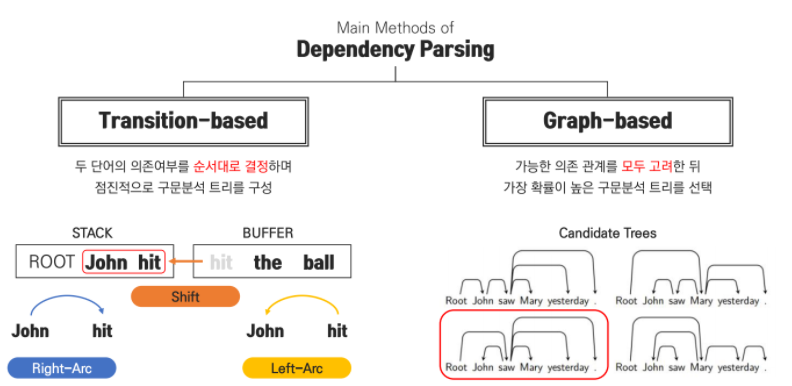

해당 spacy 모듈에서 사용하고 있는 parsing은 NN방식 dependency parsing 임. dependency parsing 에서 가장 뛰어난 성능을 보여준 모델

요약:

Parsing에는 크게 두 가지 방식이 있는데 하나는 문장의 구성을 바탕으로 파악하는 Constituency parsing과 단어들의 의존성에 기반하여 분석하는 Dependency parsing이 있다. 최근에는 Dependency parsing이 관심을 받고 주목받고 있다.

Dependency parsing은 크게 Transition-based와 Graph-based 2가지 방식으로 진행할 수 있다. Transition based의 경우, 분석 속도는 빠르지만 정확도는 떨어지지만 반대로 Graph based의 경우, 분석속도는 느리지만 정확도가 좋다고 한다.

최근에는 Neural Dependency parsing 방법이 만들어지면서 다시 한 번 발전하게 됐다. 위의 두 가지 방식의 장점들을 모두 가진 모델로 기본적인 Neural Network의 구조를 가지고 있다. 또한 word, POS tag, arc-label간 상호작용을 반영할 수 있는 cube function을 사용지만 이는 엄밀히 수학적 증명이 이루어지진 않았다.



## 짧은 문장 NER 예시


In [61]:
small_sample = '''I want floral based soapy fragrance. And I want bad longevity. I want to use in summer. I hope it doesn't smell long and volatized quickly.'''

In [62]:
doc_example = nlp_ner(small_sample)

In [63]:
spacy.displacy.render(doc_example, style="ent", jupyter=True)

In [64]:
doc_example.ents

(soapy,)